# Investment Analysis Assignment

#### Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Checkpoint 1: Data Cleaning 1

- Loading companies and rounds2 data in two dataframes namely:
    - `companies` for companies.csv
    - `rounds2` for rounds2.csv
- Using encoding as `ANSI` as loading data without specyfying encoding causes `UnicodeDecodeError`

In [2]:
# In case of a 'LookupError', run the code commented below
# pip install ANSI

# Loading the 'companies.csv' data into companies dataframe
companies = pd.read_csv('companies.csv', encoding='ANSI')

# Loading the 'rounds2.csv' data into rounds2 dataframe
rounds2 = pd.read_csv('rounds2.csv', encoding='ANSI')

#### Exploring the data and dimensions of the two dataframe

In [3]:
# Shape of companies and rounds2 dataframe
print(f"companies: {companies.shape}\nrounds2: {rounds2.shape}")

companies: (66368, 10)
rounds2: (114949, 6)


In [4]:
# Running .info() on companies dataframe
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [5]:
# Running .info() on rounds2 dataframe
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [6]:
# Top 5 records from the companies dataframe
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [7]:
# Top 5 records from the rounds2 dataframe
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


#### From the above output, we can see that there are records with the smae name but different case
<p>The image below highlights one such record</p>

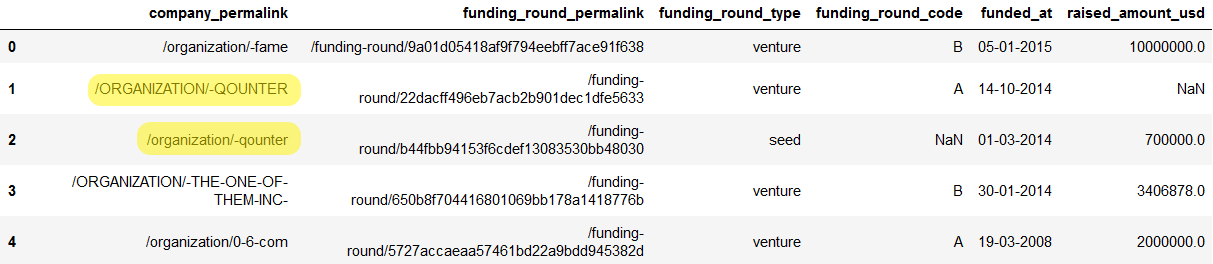

Applying `str.casefold()` to `company_permalink` to ensure all records in company_permalink have the same case

In [8]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.casefold()

# Viewing the first 5 records from the rounds2 dataframe
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


### Identifying unique companies present in the companies dataframe

In [9]:
unique_companies_in_companies = len(companies['permalink'].unique())

print(f"The are '{unique_companies_in_companies}' companies in companies dataframe.")

The are '66368' companies in companies dataframe.


### Identifying unique companies present in the rounds2 dataframe

In [10]:
unique_companies_in_rounds2 = len(rounds2['company_permalink'].unique())

print(f"The are '{unique_companies_in_rounds2}' companies in rounds2 dataframe.")

The are '66368' companies in rounds2 dataframe.


### Checking if there are any companies present in rounds2 dataframe which are not present in companies dataframe

Applying `str.casefold()` on the records in the _permalink_ column, to ensure that rounds2's _company_permalink_ column and companies _permalink_ column have the same case

In [11]:
companies['permalink'] = companies['permalink'].str.casefold()

# Viewing the first 5 records from the companies dataframe
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


- Using `.isin()` function to bet companies in _rounds2_ which are present in _companies_ dataframe
    - Using `~` on the above output to get companies in _rounds2_ which are not present in _companies_ dataframe
- Using .count() to get a numerical value for the dataframe obtained above

In [12]:
companies_in_rounds2_nin_companies = rounds2[~rounds2['company_permalink'].isin(companies['permalink'])]['company_permalink'].count()
print(f"There are '{companies_in_rounds2_nin_companies}' companies present in rounds2 which are not present in the companies dataframe")

There are '0' companies present in rounds2 which are not present in the companies dataframe


### Merging the two dataframes into a master frame

#### Merging the two dataframe such that all columns in the companies dataframe are added to the rounds2 dataframe

As the `permalink` column in the companies dataframe has zero null and all unique values, we can treat the `permalink` column as the unique key.
<br><br>
As all the values from from companies['permalink'] are present in rounds2['company_permalink'] and `company_permalink` has the same number of unique values as the `permalink` column, the dataframe can be merged with the help of these two columns

In [13]:
# Renaming rounds2 company_permalink as permalink to avoid adding a redundant column in the master_frame
rounds2.rename (columns={'company_permalink': 'permalink'}, inplace=True)

# Running .info on the rounds2 dataframe
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [14]:
# Merging the two dataframes
master_frame = pd.merge(companies, rounds2, how='inner', on='permalink')

# Running .info() on the master_frame
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   name                     114948 non-null  object 
 2   homepage_url             108815 non-null  object 
 3   category_list            111539 non-null  object 
 4   status                   114949 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94428 non-null   object 
 10  funding_round_permalink  114949 non-null  object 
 11  funding_round_type       114949 non-null  object 
 12  funding_round_code       31140 non-null   object 
 13  funded_at                114949 non-null  object 
 14  rais

#### Checking the number of observations present in master_frame

In [15]:
total_observations = master_frame.shape[0]
print(f"The number of observations present in master_frame are '{total_observations}'")

The number of observations present in master_frame are '114949'


### Cleaning the master_frame

In [16]:
# Checking the percentage of null values present in all the columns of the master_frame
round(100 * (master_frame.isnull().sum() / len(master_frame.index)), 2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

- Columns necessary for our analysis are:
    1. ___permalink___
    2. ___category_list___
    3. ___country_code___
    4. ___funding_round_type___
    5. ___raised_amount_usd___
- The rest of the columns can be dropped as they serve no purpose in our analysis

In [17]:
necessary_columns = ['permalink', 'category_list', 'country_code', 
                     'funding_round_type', 'raised_amount_usd']
print(f"Necessary Columns: {necessary_columns}")

unnecessary_columns = list(np.setdiff1d(master_frame.columns, necessary_columns))
print(f"\nUnnecessary Columns: {unnecessary_columns}")

Necessary Columns: ['permalink', 'category_list', 'country_code', 'funding_round_type', 'raised_amount_usd']

Unnecessary Columns: ['city', 'founded_at', 'funded_at', 'funding_round_code', 'funding_round_permalink', 'homepage_url', 'name', 'region', 'state_code', 'status']


In [18]:
# Dropping the unnecessary columns
master_frame = master_frame.drop(unnecessary_columns, axis=1)

# Running .info() on the master_frame
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   permalink           114949 non-null  object 
 1   category_list       111539 non-null  object 
 2   country_code        106271 non-null  object 
 3   funding_round_type  114949 non-null  object 
 4   raised_amount_usd   94959 non-null   float64
dtypes: float64(1), object(4)
memory usage: 5.3+ MB


In [19]:
# Checking the percentage of null values in master_frame
round(100 * (master_frame.isnull().sum() / len(master_frame.index)), 2)

permalink              0.00
category_list          2.97
country_code           7.55
funding_round_type     0.00
raised_amount_usd     17.39
dtype: float64

### Cleaning the records containing null values

1. Cleaning null-values in `raised_amount_usd`

In [20]:
# Setting a precision of .2f for floating point numbers
pd.options.display.float_format = '{:.2f}'.format

In [21]:
# Running .describe() on master_frame's `raised_amount_usd` to decide wether to impute or drop the records
# containing null values
master_frame['raised_amount_usd'].describe()

count         94959.00
mean       10426869.33
std       114821247.98
min               0.00
25%          322500.00
50%         1680511.00
75%         7000000.00
max     21271935000.00
Name: raised_amount_usd, dtype: float64

The mean(__10426869.33__) and the median(__1680511.00__) values have a significant diference between them. <br>As such, **_dropping the records_** would be favourable as opposed to imputing these values and introducing a bias.

In [22]:
# Dropping the records containing null values in the `raised_amount_usd` column
master_frame = master_frame[~master_frame['raised_amount_usd'].isnull()]

# Checking the percentage of null values in master_frame
round(100 * (master_frame.isnull().sum() / len(master_frame.index)), 2)

permalink            0.00
category_list        1.10
country_code         6.16
funding_round_type   0.00
raised_amount_usd    0.00
dtype: float64

2. Cleaning null values in `category_list` and `country_code`
    - While these values can be imputed using _mode_, under the assumption that the most recurring value is the missing value in the records
    - However as we have a large dataset, it would be better to drop these records instead of introducing a bias.

In [23]:
# Dropping the records containing null values in the `category_list` column
# Dropping the records containing null values in the `country_code` column
master_frame = master_frame[~(master_frame['category_list'].isnull() | master_frame['country_code'].isnull())]

In [24]:
# Checking the percentage of null values in master_frame
round(100 * (master_frame.isnull().sum() / len(master_frame.index)), 2)

permalink            0.00
category_list        0.00
country_code         0.00
funding_round_type   0.00
raised_amount_usd    0.00
dtype: float64

In [25]:
# Total observations present in the master_frame after cleaning the data
total_observations_after_cleaning = master_frame.shape[0]
print(f"Total observations after cleaning = {total_observations_after_cleaning}")

# Percentage of data lost after cleaning the master_frame
lost = round((1 - (total_observations_after_cleaning / total_observations)) * 100, 2)
print(f"Percentage of records lost = {lost}%")

Total observations after cleaning = 88529
Percentage of records lost = 22.98%


## Checkpoint 2: Funding Type Analysis

- Types of funding present in master_frame

In [26]:
pd.DataFrame(list(master_frame['funding_round_type'].unique()), columns=['funding_round_type']).set_index('funding_round_type')

""
funding_round_type
venture
seed
undisclosed
convertible_note
private_equity
debt_financing
angel
grant
equity_crowdfunding


#### Of the available investment types in the master_frame dataframe, Sparks Fund in only intrested in the Funding types:
1. ___Venture___
2. ___Angel___
3. ___Seed___
4. ___Private Equity___

In [27]:
important_fund_type = ['venture', 'angel', 'seed', 'private_equity']

# Creating a dataframe containing only these 4 funding types
fund_type = master_frame[master_frame['funding_round_type'].isin(important_fund_type)]

# Viewing the first 5 records from fund_type
fund_type.head()

,permalink,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,Media,IND,venture,10000000.00
2,/organization/-qounter,Application Platforms|Real Time|Social Network...,USA,seed,700000.00
4,/organization/0-6-com,Curated Web,CHN,venture,2000000.00
7,/organization/0ndine-biomedical-inc,Biotechnology,CAN,seed,43360.00
8,/organization/0ndine-biomedical-inc,Biotechnology,CAN,venture,719491.00


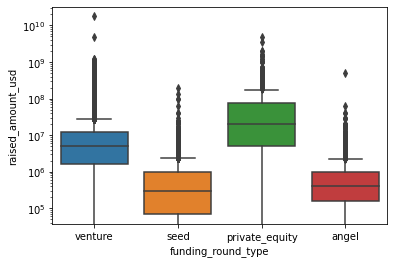

In [28]:
# Creating a boxplot to visualize the spread of `raised_amount_usd` across `funding_round_type`
sns.boxplot(data=fund_type, x='funding_round_type', y='raised_amount_usd')
# Applying log on y-scale to better visualise the boxplots
plt.yscale('log')
plt.show()

#### As there are outliers present across the funding type, median would be a better representative value of the investment amount as mean would be skewed by the outliers

In [29]:
# Creating a new dataframe fund_median to help with plotting
fund_median = pd.DataFrame(fund_type.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False))

# Resetting the index to make plotting easier
fund_median.reset_index(inplace=True)
fund_median

,funding_round_type,raised_amount_usd
0,private_equity,20000000.00
1,venture,5000000.00
2,angel,414906.00
3,seed,300000.00


In [30]:
# Funding type having the representative value between 5 to 15 million USD

fund_median[(fund_median['raised_amount_usd'] >= 5000000.00) &
            (fund_median['raised_amount_usd'] <= 15000000.00)]

,funding_round_type,raised_amount_usd
1,venture,5000000.00


#### Thus we can conclude that the investment type `venture` is the only investment type that satisfies Sparks Funds `5 to 15 million USD per investment round` criteria.

As we have now identified the funding_round_type that satisfies Sparks Funds investment criteria as venture, creating a dataframe that has records which from fund_type for `funding_round_type = venture`.

In [31]:
# Creating a dataframe 'fund_type_venture'
fund_type_venture = fund_type[fund_type['funding_round_type'] == 'venture']

# Viewing the first 5 records in fund_type_venture
fund_type_venture.head()

,permalink,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,Media,IND,venture,10000000.00
4,/organization/0-6-com,Curated Web,CHN,venture,2000000.00
8,/organization/0ndine-biomedical-inc,Biotechnology,CAN,venture,719491.00
10,/organization/0xdata,Analytics,USA,venture,20000000.00
11,/organization/0xdata,Analytics,USA,venture,1700000.00


## Checkpoint 3: Country Analysis

#### Sparks Funds wants to find the top 9 countries that have recieved the highest total funding across all sectors for the chosen investment type

In [32]:
# Creating a dataframe top9 for the top9 countries with the highest total investment
top9 = pd.DataFrame(fund_type_venture.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False))[:9]

# Resetting the index to make plotting easier
top9.reset_index(inplace=True)

# Viewing the data in the `top9` dataframe
top9

,country_code,raised_amount_usd
0,USA,420068029342.00
1,CHN,39338918773.00
2,GBR,20072813004.00
3,IND,14261508718.00
4,CAN,9482217668.00
5,FRA,7226851352.00
6,ISR,6854350477.00
7,DEU,6306921981.00
8,JPN,3167647127.00


#### Identifying the top 3 English-Speaking countries in the top9 dataframe

Using **https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language** to indentify the top 3 english speaking countries from the top9 dataframe, the top 3 countries from the dataframe turn out be:
- `USA`
- `GBR`
- `IND`

In [33]:
# The top 3 english speaking countries are USA, GBR and IND
# Moving these records to a new dataframe
top3 = fund_type_venture[fund_type_venture['country_code'].isin(['USA', 'GBR', 'IND'])]

# Viewing the first 5 records in the top3 dataframe
top3.reset_index(drop=True, inplace=True)
top3.head()

,permalink,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,Media,IND,venture,10000000.00
1,/organization/0xdata,Analytics,USA,venture,20000000.00
2,/organization/0xdata,Analytics,USA,venture,1700000.00
3,/organization/0xdata,Analytics,USA,venture,8900000.00
4,/organization/1-mainstream,Apps|Cable|Distribution|Software,USA,venture,5000000.00


In [34]:
# Adding a flag column 'Speak English' in dataframe top9 for better plotting

# Creating a list of English speaking countries from top9 with the help of the provided url
speak_english = ['USA', 'GBR', 'IND', 'CAN']

# Creating 'speak_english' column
top9['speak_english'] = top9['country_code'].apply(lambda x: 'Yes' if x in speak_english else 'No')

# Viewing the top9 dataframe
top9

,country_code,raised_amount_usd,speak_english
0,USA,420068029342.00,Yes
1,CHN,39338918773.00,No
2,GBR,20072813004.00,Yes
3,IND,14261508718.00,Yes
4,CAN,9482217668.00,Yes
5,FRA,7226851352.00,No
6,ISR,6854350477.00,No
7,DEU,6306921981.00,No
8,JPN,3167647127.00,No


# Checkpoint 4: Sector Analysis 1

- Extracting the primary sector from category_list column
    - category_list contains multiple sub-sectors seperated by a pipe (`|`)
    - The business rule to be followed states that the first string before the pipe (`|`) is to be considered as the primary sector

In [35]:
# Extracting the primary sector into a new column `primary_sector`
top3['primary_sector'] = top3['category_list'].apply(lambda x: x.split('|')[0])

# Dropping the redundant `category_list` column
top3 = top3.drop(['category_list'], axis=1)

# Viewing the first 5 records from top3 dataframe
top3.head()

,permalink,country_code,funding_round_type,raised_amount_usd,primary_sector
0,/organization/-fame,IND,venture,10000000.00,Media
1,/organization/0xdata,USA,venture,20000000.00,Analytics
2,/organization/0xdata,USA,venture,1700000.00,Analytics
3,/organization/0xdata,USA,venture,8900000.00,Analytics
4,/organization/1-mainstream,USA,venture,5000000.00,Apps


- Using mapping.csv file to map each primary sector to one of the eight main sectors

In [36]:
# Loading the 'mapping.csv' data into mapping dataframe
mapping = pd.read_csv('mapping.csv')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [37]:
# Running .info() on the mapping dataframe
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [38]:
# Cheking the number of null values in each row of mappings dataframe
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [39]:
# A single record in category_list has a null value
# Dropping the record with the null value
mapping = mapping[~mapping['category_list'].isnull()]

# Viewing the frist 5 records in the mapping dataframe
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [40]:
# Checking the columns of the mapping dataframe
mapping.iloc[:, 1:].sum()

Automotive & Sports                         22
Blanks                                       0
Cleantech / Semiconductors                  53
Entertainment                               89
Health                                      63
Manufacturing                               40
News, Search and Messaging                  72
Others                                     195
Social, Finance, Analytics, Advertising    153
dtype: int64

In [41]:
# As Blanks column has no data in it
# Dropping the Blanks column
mapping = mapping.drop('Blanks', axis=1)

# Viewing the first 5 records in the mapping dataframe
mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,1,0,0,0,0


- mapping.csv is in wide format, converting it to long format

In [42]:
# Storing the value variables in one list
value_vars = list(mapping.columns[1:])

# Using .setdiff1d() to get the rest of the variables
id_vars = list(np.setdiff1d(mapping.columns ,value_vars))

print(f"{value_vars}\n\n{id_vars}")

['Automotive & Sports', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising']

['category_list']


In [43]:
# Using melt to map the category list to the main sectors
mapping = pd.melt(mapping, id_vars=id_vars, value_vars=value_vars, var_name='main_sector', ignore_index=False)

# Filtering the necessary values
mapping = mapping[mapping['value'] == 1]

# Dropping the value column as it is no longer needed
mapping = mapping.drop('value', axis=1)

# Viewing the first 5 records in the mapping dataframe
mapping.reset_index(drop=True, inplace=True)
mapping.head()

,category_list,main_sector
0,Adventure Travel,Automotive & Sports
1,Aerospace,Automotive & Sports
2,Auto,Automotive & Sports
3,Automated Kiosk,Automotive & Sports
4,Automotive,Automotive & Sports


In [44]:
# Running .info() on the mapping dataframe
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_list  687 non-null    object
 1   main_sector    687 non-null    object
dtypes: object(2)
memory usage: 10.9+ KB


In [45]:
len(mapping['category_list'].unique())

687

Using `.str.casefold()` to ensure there are no issues caused by the case

In [46]:
# Using .str.casefold() on primary_sector of the top3 dataframe
top3['primary_sector'] = top3['primary_sector'].str.casefold()

# Using .str.casefold() on the category_list of the mapping dataframe
mapping['category_list'] = mapping['category_list'].str.casefold()

In [47]:
# Viewing the first 5 records of the  top3 dataframe
top3.head()

,permalink,country_code,funding_round_type,raised_amount_usd,primary_sector
0,/organization/-fame,IND,venture,10000000.00,media
1,/organization/0xdata,USA,venture,20000000.00,analytics
2,/organization/0xdata,USA,venture,1700000.00,analytics
3,/organization/0xdata,USA,venture,8900000.00,analytics
4,/organization/1-mainstream,USA,venture,5000000.00,apps


In [48]:
# Viewing the first 5 records of the mapping dataframe
mapping.head()

,category_list,main_sector
0,adventure travel,Automotive & Sports
1,aerospace,Automotive & Sports
2,auto,Automotive & Sports
3,automated kiosk,Automotive & Sports
4,automotive,Automotive & Sports


- Checking if all the categories in primary_sector of top3 dataframe are present in the category_list of the mapping dataframe

In [49]:
top3[~top3['primary_sector'].isin(mapping['category_list'])]

,permalink,country_code,funding_round_type,raised_amount_usd,primary_sector
1,/organization/0xdata,USA,venture,20000000.00,analytics
2,/organization/0xdata,USA,venture,1700000.00,analytics
3,/organization/0xdata,USA,venture,8900000.00,analytics
12,/organization/100plus,USA,venture,500000.00,analytics
43,/organization/1world-online,USA,venture,2500000.00,analytics
...,...,...,...,...,...
38674,/organization/zoopla,GBR,venture,5440000.00,property management
38688,/organization/zopa,GBR,venture,12900000.00,finance
38689,/organization/zopa,GBR,venture,15000000.00,finance
38690,/organization/zopa,GBR,venture,5000000.00,finance


There are __2616__ records in top3 dataframe, which have a value for primary_sector which is not present in category_list of the mapping dataframe. As __2616__ is a substancial number of records to loose:

- Checking to see if all the categories in the category_list of the mapping dataframe are present in the primary_sector of the top3 dataframe 

In [50]:
mapping[~mapping['category_list'].isin(top3['primary_sector'])]

,category_list,main_sector
6,boating industry,Automotive & Sports
21,unmanned air systems,Automotive & Sports
22,air pollution control,Cleantech / Semiconductors
23,aquaculture,Cleantech / Semiconductors
27,biomass power generation,Cleantech / Semiconductors
...,...,...
681,social news,"Social, Finance, Analytics, Advertising"
682,social recruiting,"Social, Finance, Analytics, Advertising"
683,social television,"Social, Finance, Analytics, Advertising"
684,social travel,"Social, Finance, Analytics, Advertising"


In [51]:
len(mapping[~mapping['category_list'].isin(top3['primary_sector'])])

175

- Checking the values in mapping dataframes category_list

In [52]:
# category_list has all unique values, so running .unique() again is redundant
list(mapping['category_list'])

['adventure travel',
 'aerospace',
 'auto',
 'automated kiosk',
 'automotive',
 'bicycles',
 'boating industry',
 'cad',
 'cars',
 'design',
 'designers',
 'drones',
 'electric vehicles',
 'fuels',
 'heavy industry',
 'industrial automation',
 'limousines',
 'soccer',
 'sporting goods',
 'sports',
 'transportation',
 'unmanned air systems',
 'air pollution control',
 'aquaculture',
 'bio-pharm',
 'biofuels',
 'bioinformatics',
 'biomass power generation',
 'biometrics',
 'biotechnology',
 'bitcoin',
 'carbon',
 'chemicals',
 'clean energy',
 'clean technology',
 'clean technology it',
 'commercial solar',
 'commodities',
 'concentrated solar power',
 'disruptive models',
 'early-stage technology',
 'energy',
 'energy efficiency',
 'energy it',
 'energy ma0gement',
 'energy storage',
 'environmental innovation',
 'fertility',
 'fuel cells',
 'funeral industry',
 'gas',
 'green',
 'green consumer goods',
 'home & garden',
 'home automation',
 'home decor',
 'lighting',
 'material science

When going through the values present in category_list of the mapping dataframe, there appear to be a error in the data. The image below highlights the issue:

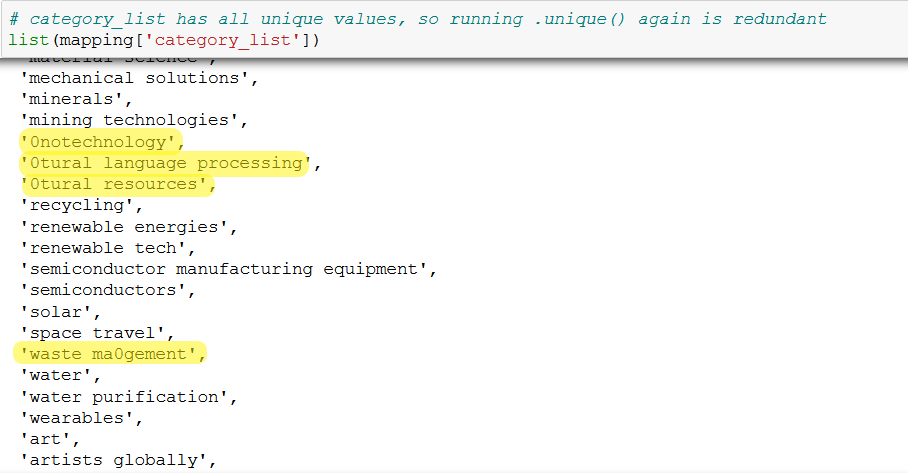

'na' has been replaced with 0, as can be seen in the picture where '`na`notechnology' has become '0notechnology', or '`na`tural' has become '0tural', or 'ma`na`gement' has become 'ma0gement'.

- Replacing '0' in the category list with 'na'

In [53]:
# Before replacing '0' with 'na', checking the values in the affected records
mapping[~mapping['category_list'].apply(lambda x: x if any(ele in '0' for ele in x) else '').isin([''])]['category_list']

44                 energy ma0gement
61                    0notechnology
62       0tural language processing
63                 0tural resources
71                  waste ma0gement
98         digital rights ma0gement
99                   digital sig0ge
102                educatio0l games
106                 event ma0gement
165             alter0tive medicine
174                         can0bis
204            medical professio0ls
213                  perso0l health
226                       veteri0ry
283                   chi0 internet
289                 cloud ma0gement
309                       jour0lism
319                       0vigation
329          professio0l networking
350              document ma0gement
360                  enterprise 2.0
372                 fleet ma0gement
382                       gover0nce
403    intellectual asset ma0gement
411                    it ma0gement
414             knowledge ma0gement
419                  lead ma0gement
457                    perso

On traversing the list printed above, '**enterprise 2.0**' is the only record with a __valid '0' value__, rest of the records __have 'na' replaced with '0'__.

In [54]:
# Replacing '0' in the category_list for mapping with 'na'
mapping['category_list'] = mapping['category_list'].apply(lambda x: x if x[-1] == '0' else x.replace('0', 'na'))

# Checking if there are any zeros present in the category_list aside from the zero in 'enterprise 2.0'
mapping[~mapping['category_list'].apply(lambda x: x if any(ele in '0' for ele in x) else '').isin([''])]

,category_list,main_sector
360,enterprise 2.0,Others


Now that '0' has been replaced with 'na':
- Checking if all the categories in primary_sector of top3 dataframe are present in the category_list of the mapping dataframe

In [55]:
top3[~top3['primary_sector'].isin(mapping['category_list'])]

,permalink,country_code,funding_round_type,raised_amount_usd,primary_sector
7345,/organization/clean-vehicle-solutions,USA,venture,125000.00,natural gas uses
10162,/organization/dolores-speech-products,USA,venture,250000.00,adaptive equipment
12375,/organization/fia-formula-e,GBR,venture,68569234.00,racing
12630,/organization/five-below,USA,venture,194000000.00,specialty retail
14956,/organization/healthtell,USA,venture,9486929.00,biotechnology and semiconductor
17882,/organization/justinmind,USA,venture,862000.00,rapidly expanding
23816,/organization/omega-point-research,USA,venture,3172815.00,product search
29949,/organization/sense-labs-inc-,USA,venture,2499999.00,greentech
30210,/organization/shantiniketan-incorporated,USA,venture,1100000.00,retirement
30211,/organization/shantiniketan-incorporated,USA,venture,2000000.00,retirement


In [56]:
len(top3[~top3['primary_sector'].isin(mapping['category_list'])])

11

Now there are only __11__ records which have a value for primary_sector which is not in the category_list of the mapping dataframe. This is much better then the previous observation where the value was __2616__ records.

- Checking if all the categories in category_list of mapping dataframe are present in the primary_sector of the top3 dataframe

In [57]:
mapping[~mapping['category_list'].isin(top3['primary_sector'])]

,category_list,main_sector
6,boating industry,Automotive & Sports
21,unmanned air systems,Automotive & Sports
22,air pollution control,Cleantech / Semiconductors
23,aquaculture,Cleantech / Semiconductors
27,biomass power generation,Cleantech / Semiconductors
...,...,...
681,social news,"Social, Finance, Analytics, Advertising"
682,social recruiting,"Social, Finance, Analytics, Advertising"
683,social television,"Social, Finance, Analytics, Advertising"
684,social travel,"Social, Finance, Analytics, Advertising"


In [58]:
len(mapping[~mapping['category_list'].isin(top3['primary_sector'])])

133

The value of categories present in mapping dataframes category_list which are not present in top3 dataframes primary_sector have gone down from __175__ to __133__.

- Using `category_list` and `primary_sector` as the keys for merging

In [59]:
sector_analysis = pd.merge(top3, mapping, how='inner', left_on='primary_sector', right_on='category_list')

# Dropping the category_list column as it is redundant
sector_analysis = sector_analysis.drop(['category_list'], axis=1)

# Viewing the first 5 records of the sector analysis dataframe
sector_analysis.head()

,permalink,country_code,funding_round_type,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,IND,venture,10000000.00,media,Entertainment
1,/organization/90min,GBR,venture,15000000.00,media,Entertainment
2,/organization/90min,GBR,venture,5800000.00,media,Entertainment
3,/organization/90min,GBR,venture,18000000.00,media,Entertainment
4,/organization/all-def-digital,USA,venture,5000000.00,media,Entertainment


# Checkpoint 5: Sector Analysis 2

#### Creating 3 seperate dataframes D1, D2 and D3 for:
- Each of the 3 countries ('USA', 'GBR', 'IND)
- Funding type is venture
- Funding investment range is between 5 to 15 Million USD

In [60]:
# Creating dataframe D1 for the country 'USA'
D1 = sector_analysis[(sector_analysis['country_code'] == 'USA') &
                     (sector_analysis['raised_amount_usd'] >= 5000000) &
                     (sector_analysis['raised_amount_usd'] <= 15000000)]

# Viewing the first 5 records in the D1 dataframe
D1.reset_index(drop=True, inplace=True)
D1.head()

,permalink,country_code,funding_round_type,raised_amount_usd,primary_sector,main_sector
0,/organization/all-def-digital,USA,venture,5000000.00,media,Entertainment
1,/organization/chefs-feed,USA,venture,5000000.00,media,Entertainment
2,/organization/huffingtonpost,USA,venture,5000000.00,media,Entertainment
3,/organization/huffingtonpost,USA,venture,5000000.00,media,Entertainment
4,/organization/matchmine,USA,venture,10000000.00,media,Entertainment


In [61]:
# Creating dataframe D2 for the country 'GBR'
D2 = sector_analysis[(sector_analysis['country_code'] == 'GBR') &
                     (sector_analysis['raised_amount_usd'] >= 5000000) &
                     (sector_analysis['raised_amount_usd'] <= 15000000)]

# Viewing the first 5 records in the D2 dataframe
D2.reset_index(drop=True, inplace=True)
D2.head()

,permalink,country_code,funding_round_type,raised_amount_usd,primary_sector,main_sector
0,/organization/90min,GBR,venture,15000000.00,media,Entertainment
1,/organization/90min,GBR,venture,5800000.00,media,Entertainment
2,/organization/aihit,GBR,venture,5500000.00,analytics,"Social, Finance, Analytics, Advertising"
3,/organization/brandwatch,GBR,venture,6000000.00,analytics,"Social, Finance, Analytics, Advertising"
4,/organization/digital-shadows,GBR,venture,8000000.00,analytics,"Social, Finance, Analytics, Advertising"


In [62]:
# Creating dataframe D3 for the country 'IND'
D3 = sector_analysis[(sector_analysis['country_code'] == 'IND') &
                     (sector_analysis['raised_amount_usd'] >= 5000000) &
                     (sector_analysis['raised_amount_usd'] <= 15000000)]

# Viewing the first 5 records in the D3 dataframe
D3.reset_index(drop=True, inplace=True)
D3.head()

,permalink,country_code,funding_round_type,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,IND,venture,10000000.00,media,Entertainment
1,/organization/eka-software-solutions,IND,venture,6000000.00,analytics,"Social, Finance, Analytics, Advertising"
2,/organization/eka-software-solutions,IND,venture,10000000.00,analytics,"Social, Finance, Analytics, Advertising"
3,/organization/loginext-solutions,IND,venture,10000000.00,analytics,"Social, Finance, Analytics, Advertising"
4,/organization/manthan-systems,IND,venture,5700000.00,analytics,"Social, Finance, Analytics, Advertising"


#### For dataframe D1

In [63]:
# Total number of investments in D1
print(f"Total number of investments in USA: {D1['raised_amount_usd'].count()}")

# Total amount of investments in D1
print(f"Total amount of investment in USA: {D1['raised_amount_usd'].sum()}")

Total number of investments in USA: 12063
Total amount of investment in USA: 107757097294.0


In [64]:
# Total number of investments in each main sector in D1
D1['main_sector'].value_counts().sort_values(ascending=False)

Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: main_sector, dtype: int64

#### For dataframe D2

In [65]:
# Total number of investments in D2
print(f"Total number of investments in GBR: {D2['raised_amount_usd'].count()}")

# Total amount of investments in D2
print(f"Total amount of investment in GBR: {D2['raised_amount_usd'].sum()}")

Total number of investments in GBR: 621
Total amount of investment in GBR: 5379078691.0


In [66]:
# Total number of investments in each main sector in D2
D2['main_sector'].value_counts().sort_values(ascending=False)

Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: main_sector, dtype: int64

#### For dataframe D3

In [67]:
# Total number of investments in D3
print(f"Total number of investments in IND: {D3['raised_amount_usd'].count()}")

# Total amount of investment in D3
print(f"Total amount of investment in IND: {D3['raised_amount_usd'].sum()}")

Total number of investments in IND: 328
Total amount of investment in IND: 2949543602.0


In [68]:
# Total number of investments in each main sector in D3
D3['main_sector'].value_counts().sort_values(ascending=False)

Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: main_sector, dtype: int64

#### Top sector (count wise), company that recieved the highest investment

In [69]:
# For dataframe D1
D1[D1['main_sector'] == 'Others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(2)

permalink
/organization/virtustream   64300000.00
/organization/capella       54968051.00
Name: raised_amount_usd, dtype: float64

In [70]:
# For dataframe D2
D2[D2['main_sector'] == 'Others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(2)

permalink
/organization/electric-cloud   37000000.00
/organization/sensage          36250000.00
Name: raised_amount_usd, dtype: float64

In [71]:
# For dataframe D3
D3[D3['main_sector'] == 'Others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(2)

permalink
/organization/firstcry-com   39000000.00
/organization/myntra         38000000.00
Name: raised_amount_usd, dtype: float64

#### Second best sector (count wise) company that recieved the highest invetment

In [72]:
# For dataframe D1
D1[D1['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(2)

permalink
/organization/shotspotter   67933006.00
/organization/demandbase    63000000.00
Name: raised_amount_usd, dtype: float64

In [73]:
# For dataframe D2
D2[D2['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(2)

permalink
/organization/celltick-technologies   37500000.00
/organization/mythings                34000000.00
Name: raised_amount_usd, dtype: float64

In [74]:
# For dataframe D3
D3[D3['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(2)

permalink
/organization/manthan-systems   50700000.00
/organization/komli-media       28000000.00
Name: raised_amount_usd, dtype: float64

# Checkpoint 6: Plots

- A plot showing the __representative amount of invsetment__ in each funding type

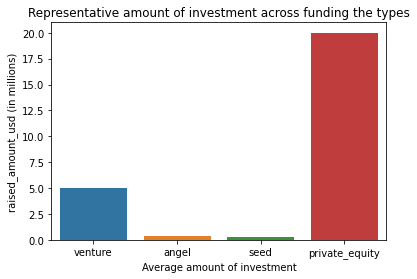

In [75]:
# Plot 1: Representative amount of investment
sns.barplot(x=fund_median['funding_round_type'], y=fund_median['raised_amount_usd'] / 1000000, order=['venture', 'angel', 'seed', 'private_equity'])
plt.ylabel('raised_amount_usd (in millions)')
plt.xlabel('Average amount of investment')
plt.title('Representative amount of investment across funding the types')
plt.show()

- Plot showing the __top 9 countries against total amount of investments__

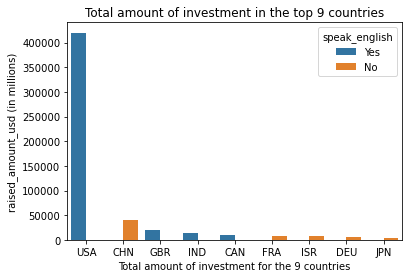

In [76]:
# Plot 2: Top 9 countries against total amount of investments
sns.barplot(x=top9['country_code'], y=top9['raised_amount_usd'] / 1000000, hue=top9['speak_english'])
plt.ylabel('raised_amount_usd (in millions)')
plt.xlabel('Total amount of investment for the 9 countries')
plt.title('Total amount of investment in the top 9 countries')
plt.show()

- A plot showing __number of investments in the top 3 sectors of the top 3 countries__ in a single graph
    - Creating a dataframe for each country for ease of plotting

In [77]:
# Creating a dataframe for sector count in USA
sector_count_usa = pd.DataFrame(D1.groupby('main_sector')['main_sector'].count().
                                rename('sector_count').
                                sort_values(ascending=False)).head(3)

# Creating a column for the country name
sector_count_usa['country'] = 'USA'

# Resetting the index and viewing the dataframe
sector_count_usa.reset_index(inplace=True)
sector_count_usa

,main_sector,sector_count,country
0,Others,2950,USA
1,"Social, Finance, Analytics, Advertising",2714,USA
2,Cleantech / Semiconductors,2350,USA


In [78]:
# Creating a dataframe for sector count in GBR
sector_count_gbr = pd.DataFrame(D2.groupby('main_sector')['main_sector'].count().
                                rename('sector_count').
                                sort_values(ascending=False)).head(3)

# Creating a column for the country name
sector_count_gbr['country'] = 'GBR'

# Resetting the index and viewing the dataframe
sector_count_gbr.reset_index(inplace=True)
sector_count_gbr

,main_sector,sector_count,country
0,Others,147,GBR
1,"Social, Finance, Analytics, Advertising",133,GBR
2,Cleantech / Semiconductors,130,GBR


In [79]:
# Creating a dataframe for sector count in IND
sector_count_ind = pd.DataFrame(D3.groupby('main_sector')['main_sector'].count().
                                rename('sector_count').
                                sort_values(ascending=False)).head(3)

# Creating a column for the country name
sector_count_ind['country'] = 'IND'

# Resetting the index and viewing the dataframe
sector_count_ind.reset_index(inplace=True)
sector_count_ind

,main_sector,sector_count,country
0,Others,110,IND
1,"Social, Finance, Analytics, Advertising",60,IND
2,"News, Search and Messaging",52,IND


In [80]:
# Merging the above 3 dataframe to get a single sector count dataframe for the 3 countries
sector_count = pd.merge(
                    pd.merge(sector_count_usa, sector_count_gbr, how='outer'),
                    sector_count_ind, how='outer')

# Viewing the records in the sector_count dataframe
sector_count

,main_sector,sector_count,country
0,Others,2950,USA
1,"Social, Finance, Analytics, Advertising",2714,USA
2,Cleantech / Semiconductors,2350,USA
3,Others,147,GBR
4,"Social, Finance, Analytics, Advertising",133,GBR
5,Cleantech / Semiconductors,130,GBR
6,Others,110,IND
7,"Social, Finance, Analytics, Advertising",60,IND
8,"News, Search and Messaging",52,IND


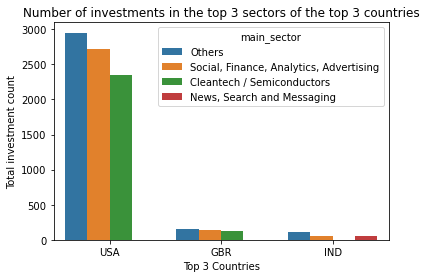

In [81]:
# Plot 3: Number of investments in the top 3 sectors of the top 3 countries
sns.barplot(data=sector_count, x='country', y='sector_count', hue='main_sector')
plt.ylabel('Total investment count')
plt.xlabel('Top 3 Countries')
plt.title('Number of investments in the top 3 sectors of the top 3 countries')
plt.show()